In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2


location = 'Shapla Bil_358'  #garden
name_of_frame = 'frame'+'1'

r = os.getcwd()
root_dir = os.path.join(r, location, name_of_frame)

# Binary Semantic Segmentation

In [2]:
image_1 = Image.open(os.path.join(root_dir,"bg.tif"))   ##img1 is for Background
image_2 = Image.open(os.path.join(root_dir,"1.tif"))
image_3 = Image.open(os.path.join(root_dir,"2.tif"))
#image_4 = Image.open(os.path.join(root_dir,"3.tif"))
#image_5 = Image.open(os.path.join(root_dir,"4.tif"))
#image_6 = Image.open(os.path.join(root_dir,"5.tif"))

# Convert images to NumPy arrays
array_1 = np.array(image_1)
array_2 = np.array(image_2)
array_3 = np.array(image_3)
#array_4 = np.array(image_4)
#array_5 = np.array(image_5)
# array_6 = np.array(image_6)

#################################################################
####### NEED TO SET IT MANUALLY FROM OUR DOCUMENTED LABEL #######
#################################################################
class_bg_label = 0    ####label 1 is for Background ###
class_fg_label = 1

binary_mask = np.zeros_like(array_1)

# Assign labels to different classes 
binary_mask[array_1 == 1] = class_bg_label  # Change 1 to the value representing class 1 in image_1
binary_mask[array_2 == 1] = class_fg_label  
binary_mask[array_3 == 1] = class_fg_label  
#binary_mask[array_4 == 1] = class_fg_label 
#binary_mask[array_5 == 1] = class_fg_label
# binary_mask[array_6 == 1] = class_fg_label

# Multiclass semantic segmentation

In [3]:
#################################################################
####### NEED TO SET IT MANUALLY FROM OUR DOCUMENTED LABEL #######
#################################################################

label_list = [0,9,5]
bin_img_list = [array_1, array_2, array_3] #, array_4, array_5, array_5, array_6]


class_1_label = label_list[0]    ####label 1 is for Background ###
class_2_label = label_list[1]
class_3_label = label_list[2]
#class_4_label = label_list[3]
#class_5_label = label_list[4]
#class_6_label = label_list[5]
#class_7_label = label_list[6]
#class_8_label = label_list[7]

multiclass_mask = np.zeros_like(array_1)

# Assign labels to different classes 
multiclass_mask[array_1 == 1] = class_1_label  # Change 1 to the value representing class 1 in image_1
multiclass_mask[array_2 == 1] = class_2_label  
multiclass_mask[array_3 == 1] = class_3_label  
#multiclass_mask[array_4 == 1] = class_4_label 
#multiclass_mask[array_5 == 1] = class_5_label
#multiclass_mask[array_6 == 1] = class_6_label
#multiclass_mask[array_7 == 1] = class_7_label
#multiclass_mask[array_8 == 1] = class_8_label

# Saving binary class pic for demo

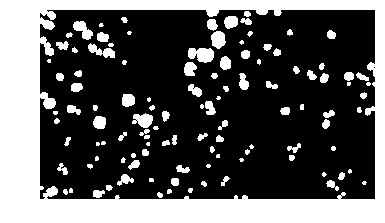

In [4]:
# Display the NumPy array as a grayscale image using Matplotlib
plt.imshow(binary_mask, cmap='cubehelix')
plt.axis('off') 
plt.show()
plt.imsave(os.path.join(root_dir,f'{location}_frame{name_of_frame}_binarydemo.png'), binary_mask, cmap='cubehelix')

# Saving multiclass pic for demo

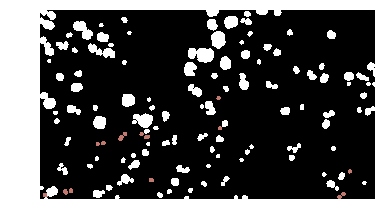

In [5]:
# Display the NumPy array as a grayscale image using Matplotlib
plt.imshow(multiclass_mask, cmap='cubehelix')
plt.axis('off') 
plt.show()
plt.imsave(os.path.join(root_dir,f'{location}_frame{name_of_frame}_multiclassdemo.png'), multiclass_mask, cmap='cubehelix')

In [ ]:
# np.unique(multiclass_mask)
# np.unique(uint8_array)

In [6]:
uint8_array_b = binary_mask.astype(np.uint8)
cv2.imwrite(os.path.join(root_dir,f'{location}_frame{name_of_frame}_binarymain.png'), uint8_array_b)
print(np.unique(uint8_array_b))

uint8_array_m = multiclass_mask.astype(np.uint8)
cv2.imwrite(os.path.join(root_dir,f'{location}_frame{name_of_frame}_multiclassmain.png'), uint8_array_m)
print(np.unique(uint8_array_m))

[0 1]
[0 5 9]


# Reading the binary image

In [22]:
import cv2
image_path = os.path.join(root_dir,f'{location}_frame{name_of_frame}_binarymain.png')
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image = (image/max(image.ravel())*255
# cv2.imshow('Image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

print(np.unique(gray_image))

[0 1]


# Counting pixels

In [23]:
import numpy as np
m = max(gray_image.ravel())
freq_list = [0]*(m+1)

total = 0

for target_value in range(m+1):
    frequency = np.count_nonzero(gray_image.ravel() == target_value)
    freq_list[target_value] = frequency 
    total += frequency

freq_list

[7388940, 905460]

# Finding ratio for aquatic plants (binary)

In [24]:
total_pix = gray_image.shape[0]*gray_image.shape[1]

multiplier = 100
result_list = [element * multiplier for element in freq_list]

divisor = total_pix 
ratio = [element / divisor for element in result_list]

ratio

[89.08347800925925, 10.91652199074074]

# Reading the Multiclass Image

In [19]:
import cv2
image_path = os.path.join(root_dir,f'{location}_frame{name_of_frame}_multiclassmain.png')
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(np.unique(gray_image))

[0 5 9]


In [20]:
import numpy as np
m = len(np.unique(gray_image))
freq_list_mc = [0]*m

total = 0

for i, target_value in enumerate(label_list):
    frequency = np.sum(gray_image.ravel() == target_value)
    freq_list_mc[i] = frequency 
    total += frequency

print(freq_list_mc)


###########################
## Calculating percentage
###########################
total_pix = gray_image.shape[0]*gray_image.shape[1]

multiplier = 100
result_list = [element * multiplier for element in freq_list_mc]

divisor = total_pix 
ratio_mc = [element / divisor for element in result_list]

print(ratio_mc)

[7388940, 870599, 34861]
[89.08347800925925, 10.496226369598766, 0.42029562114197533]


# Saving data to excel

In [33]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_excel('All info of images.xlsx')

# Access all rows and columns
print(df)

              Zone     Image Name  Binary Vegetation pixel counts  \
0       BAU Garden  garden_frame2                         1635922   
1  Zinda_park_0258         frame1                         1003821   
2  Zinda_park_0258         frame1                         1003821   
3   Shapla Bil_358         frame1                          905460   

   Binary Vegetation Pixel Ratio          0   1   2   3   4        5  ...  \
0                      19.723211        NaN NaN NaN NaN NaN      NaN  ...   
1                      12.102394  7290579.0 NaN NaN NaN NaN   4970.0  ...   
2                      12.102394  7290579.0 NaN NaN NaN NaN   4970.0  ...   
3                      10.916522  7388940.0 NaN NaN NaN NaN  34861.0  ...   

   6obj  7obj  8obj   9obj  10obj  11obj  12obj  13obj  14obj  15obj  
0   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN 

In [29]:
new_row = {'Zone': location, 'Image Name': name_of_frame, 'Binary Vegetation pixel counts': freq_list[1], 'Binary Vegetation Pixel Ratio':ratio[1]}  # Replace with your column names and values

# Append the new row to the DataFrame
df = df.append(new_row, ignore_index=True)

#########################################
### Saving pixels number for each class
#########################################

for j, label in enumerate(label_list):
    des_col = df.columns.to_list().index(label)
    df.iloc[-1, des_col] = freq_list_mc[j]

            
# # Write the updated DataFrame back to the CSV file
# df.to_excel('All info of images.xlsx', index=False)

# Counting isolated objects

In [30]:
from skimage import measure

#bin_img_list = [array_1, array_2, array_3] #, array_4, array_5, array_5, array_6]

obj_freq = [0]*len(bin_img_list)
total_obj = 0

for i, target_bin_img in enumerate(bin_img_list):
    # Perform connected component analysis
    labels = measure.label(bin_img_list[i], connectivity=2)   #binary_mask
    # Count the number of isolated objects
    num_objects = np.max(labels)
    obj_freq[i] = num_objects 
    total_obj += num_objects

print(obj_freq)

[1, 128, 15]


# Saving object count to excel file

In [31]:
modified_list = [str(num) + 'obj' for num in label_list]
modified_list

for j, label in enumerate(modified_list):
    des_col = df.columns.to_list().index(label)
    df.iloc[-1, des_col] = obj_freq[j]
    
    
df.to_excel('All info of images.xlsx', index=False)

In [16]:
# Perform preprocessing (e.g., thresholding)
#_, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Perform connected component analysis
# labels = measure.label(array_3, connectivity=2)   #binary_mask

# # Count the number of isolated objects
# num_objects = np.max(labels)

# print("Number of isolated objects:", num_objects)

['0obj', '9obj', '5obj']